In [44]:
import numpy as np
import seaborn as sns
from tqdm import trange
from scipy.stats import norm
from scipy.stats import uniform
import matplotlib.pyplot as plt

# plotting params
%matplotlib inline
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['figure.figsize'] = (15.0, 8.0)
sns.set_style("white")

# path params
plot_dir = './plots/'

## 6.7 Importance Sampling for Off-Policy Estimation 

Recall that Monte Carlo sampling allows us to estimate the expectation of a random function by sampling from the corresponding probability distribution. More precisely, if p(x) is a 1-dim (continuous) probability density, and X ∼ p is a stochastic variable distributed according to this density p, then the expected value of some function f can be estimated using Monte Carlo
sampling by:

$$ E_p(f(X)) =\int f(x)p(x) dx \approx \frac{1}{n} \sum_{i=1}^{n}f(X_i)$$

for sample of independent $X_1, X_2,...,X_n ~p$.


## Importance Sampling

With importance sampling, we try to reduce the variance of our Monte-Carlo integral estimation by choosing a better distribution from which to simulate our random variables. It involves multiplying the integrand by 1 (usually dressed up in a “tricky fashion”) to yield an expectation of a quantity that varies less than the original integrand over the region of integration. Concretely,

$$\mathbb{E}_{p(x)} \big[\ f(x) \big] = \int f(x)\ p(x)\ dx = \int f(x)\ p(x)\ \frac{q(x)}{q(x)}\ dx = \int \frac{p(x)}{q(x)}\cdot f(x)\ q(x)\ dx = \mathbb{E}_{q(x)}  \big[\ f(x)\cdot \frac{p(x)}{q(x)} \big]$$

Thus, the MC estimation of the expectation becomes:

$$\mathbb{E}_{q(x)}  \big[\ f(x)\cdot \frac{p(x)}{q(x)} \big] \approx \frac{1}{N} \sum_{i=1}^{n} w_i \cdot f(x_i)$$

where $w_i = \dfrac{p(x_i)}{q(x_i)}$

1. Let X ∼ N(0; 1) be a standard normal stochastic variable. Use importance sampling to estimate $E(X^2)$ by sampling from a uniform distribution $q ∼ U(−5; 5)$ on the interval $[−5; 5]$. What value do you expect (based on your knowledge of the normal distribution)? How accurate is your estimate based on importance sampling?

In [45]:
def importance_sampling(num_simulations, num_samples, verbose=True, plot=False):
    
    if verbose:
        print("===================================================")
        print("{} Importance Sampling Simulations of size {}".format(num_simulations, num_samples))
        print("===================================================\n")
    
    num_simulations = int(num_simulations)
    num_samples = int(num_samples)
    
    probas = []
    for i in range(num_simulations):
        mu_1, sigma_1 = 0, 1
        mu_1_n, sigma_1_n = 1, 1
        a, b = -5, 5
        
        # setup pdfs
        old_pdf_1 = norm(mu_1, sigma_1)
        new_pdf_1 = uniform(a, b-a)

        #X = np.random.normal(mu_1_n, sigma_1_n, num_samples)
        X = np.random.uniform(a, b)
        f_of_X = pow(X,2)
        

        # calculate weight
        num = old_pdf_1.pdf(X) 
        denum = new_pdf_1.pdf(X)
        weights = num / denum

        # compute unbiased proba
        proba = np.sum(weights) / num_samples
        probas.append(proba)
        
        if plot:
            if i == num_simulations -1:
                plt.scatter(X, f_of_X, color='r')
                plt.xlabel(r'$X $')
                plt.ylabel(r'$x^2$')
                plt.title("Monte Carlo Estimation")
                plt.grid(True)
                plt.savefig(plot_dir + 'imp_sampling_{}.pdf'.format(num_samples), format='pdf', dpi=300)
                plt.show()
    
    
    mean_proba = np.mean(probas)
    std_proba = np.std(probas)
    
    if verbose:
        print("Probability Mean: {}".format(mean_proba))
        print("Probability Std: {}".format(std_proba))
    
    return probas

10 Importance Sampling Simulations of size 10000



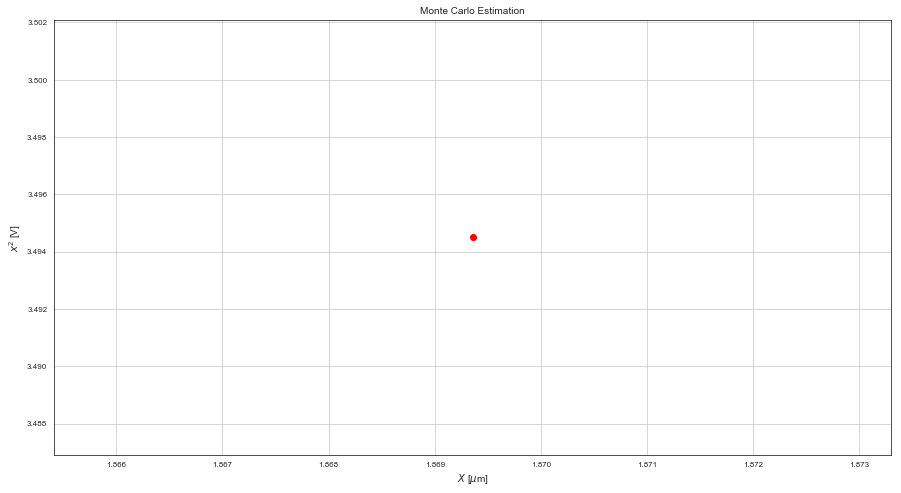

Probability Mean: 8.830987640322434e-05
Probability Std: 9.608920080405446e-05


In [47]:
probas = importance_sampling(10, 10000, plot=True)

In [48]:
def IS_histogram(num_samples, plot=True):
    
    num_samples = int(num_samples)

    mu_1_n, sigma_1_n = 0, 1

    X = np.random.normal(mu_1_n, sigma_1_n, num_samples)
    f_of_X = pow(X,2)

    if plot:
        n, bins, patches = plt.hist(f_of_X, 50, normed=1, facecolor='green', alpha=0.75)
        plt.ylabel('Number of Samples')
        plt.xlabel(r'$X^2$')
        plt.title("Importance Sampling")
        plt.grid(True)
        plt.savefig(plot_dir + 'is_histogram_{}.pdf'.format(num_samples), format='pdf', dpi=300)
        plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


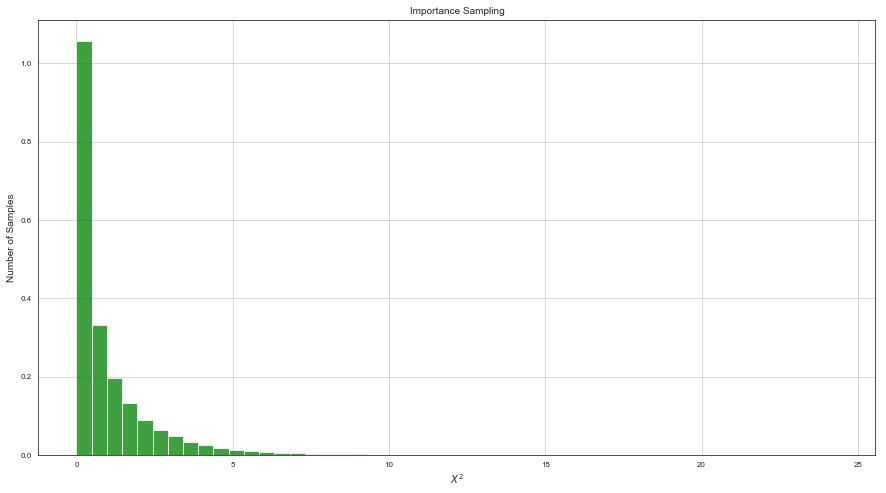

In [49]:
IS_histogram(1e5)

In [50]:
num_samples = [1e3, 1e4, 1e5, 1e6]
num_repetitions = 25

total_probas = []
for i, num_sample in enumerate(num_samples):
    print("Iter {}/{}".format(i+1, len(num_samples)))
    probas = importance_sampling(num_repetitions, num_sample, verbose=False)
    total_probas.append(probas)

Iter 1/4
Iter 2/4
Iter 3/4
Iter 4/4


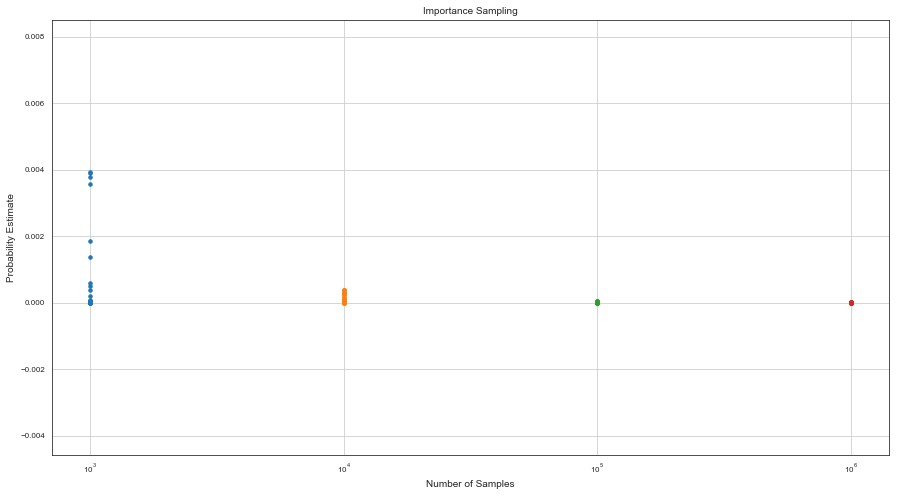

In [52]:
y_axis = np.asarray(total_probas)
x_axis = np.asarray(num_samples)

for x, y in zip(x_axis, y_axis):
    plt.scatter([x] * len(y), y, s=12)
    
plt.xscale('log')
plt.title("Importance Sampling")
plt.ylabel("Probability Estimate")
plt.xlabel('Number of Samples')
plt.grid(True)
plt.savefig(plot_dir + 'imp_sampling_convergence_speed.pdf', format='pdf', dpi=300)
plt.show()

## References

* http://ib.berkeley.edu/labs/slatkin/eriq/classes/guest_lect/mc_lecture_notes.pdf